In [1]:
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 알고리즘
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# 검정
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, \
recall_score, f1_score, roc_auc_score

# 최적화
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv('E:/FinancialDataMining/data/BankPersonalLoan.csv')

In [3]:
df['Experience'] = df['Experience'].mask(df['Experience']<0, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
df.drop(['ID', 'Age', 'ZIP Code'], axis = 1, inplace = True)

In [6]:
df.describe()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,20.140400,73.774200,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,11.405644,46.033729,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,0.000000,8.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,10.000000,39.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,20.000000,64.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,30.000000,98.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,43.000000,224.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
df.to_csv('E:/FinancialDataMining/data/clean_PersonalLoan.csv', index = False)

In [8]:
df = pd.read_csv('E:/FinancialDataMining/data/clean_PersonalLoan.csv')

In [9]:
df.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


In [10]:
X = df.drop('Personal Loan', axis = 1)
y = df['Personal Loan']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3500, 10) (1500, 10) (3500,) (1500,)


In [12]:
tree_m = DecisionTreeClassifier(criterion = 'gini', max_depth = None, random_state = 1)
tree_m.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [13]:
y_pred = tree_m.predict(X_test)

In [14]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,1345,11
1,18,126


In [15]:
print('오분류 개수 : ', (y_test != y_pred).sum())
print('정확도 : ', round(accuracy_score(y_test, y_pred),3))
print('정밀도 : ', round(precision_score(y_test, y_pred),3))
print('재현율 : ', round(recall_score(y_test, y_pred),3))
print('f1 : ', round(f1_score(y_test, y_pred),3))
print('auc : ', round(roc_auc_score(y_test, y_pred),3))

오분류 개수 :  29
정확도 :  0.981
정밀도 :  0.92
재현율 :  0.875
f1 :  0.897
auc :  0.933


---

## 12주차 강의

In [16]:
pipe_tree = make_pipeline(DecisionTreeClassifier())

In [17]:
pipe_tree.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'decisiontreeclassifier', 'decisiontreeclassifier__ccp_alpha', 'decisiontreeclassifier__class_weight', 'decisiontreeclassifier__criterion', 'decisiontreeclassifier__max_depth', 'decisiontreeclassifier__max_features', 'decisiontreeclassifier__max_leaf_nodes', 'decisiontreeclassifier__min_impurity_decrease', 'decisiontreeclassifier__min_impurity_split', 'decisiontreeclassifier__min_samples_leaf', 'decisiontreeclassifier__min_samples_split', 'decisiontreeclassifier__min_weight_fraction_leaf', 'decisiontreeclassifier__presort', 'decisiontreeclassifier__random_state', 'decisiontreeclassifier__splitter'])

In [18]:
## GridSearchCV 최적화

param_crt = ['gini', 'entropy']
param_mxd = [None, 3, 4, 5, 6, 7, 8, 9, 10]
param_mss = [10, 20, 30, 40, 50]

param_grid = [{'decisiontreeclassifier__criterion' : param_crt,
               'decisiontreeclassifier__max_depth' : param_mxd,
               'decisiontreeclassifier__min_samples_split' : param_mss}]

clf_cv = GridSearchCV(estimator = pipe_tree,
            param_grid = param_grid,
            scoring = 'f1',
            n_jobs = -1,
            cv = 10)

clf_cv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid=[{'decisiontreeclassifier__criterion': ['gini',
                                                                'entropy'],
                          'decisiontreeclassifier__max_depth': [None, 3, 4, 5,
                                                                6, 7, 8, 9,
                                                                10],
                          'decisiontreeclassifier__min_samples_split': [10, 20,
                                                                        30, 40,
                                                                        50]}],
             scoring='f1')

In [19]:
print(round(clf_cv.best_score_, 3))
print(clf_cv.best_params_)

0.926
{'decisiontreeclassifier__criterion': 'entropy', 'decisiontreeclassifier__max_depth': 6, 'decisiontreeclassifier__min_samples_split': 10}


In [20]:
tree_m_new = DecisionTreeClassifier(criterion = 'gini', max_depth = 6, min_samples_split = 10, random_state = 1)
tree_m_new.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=10, random_state=1)

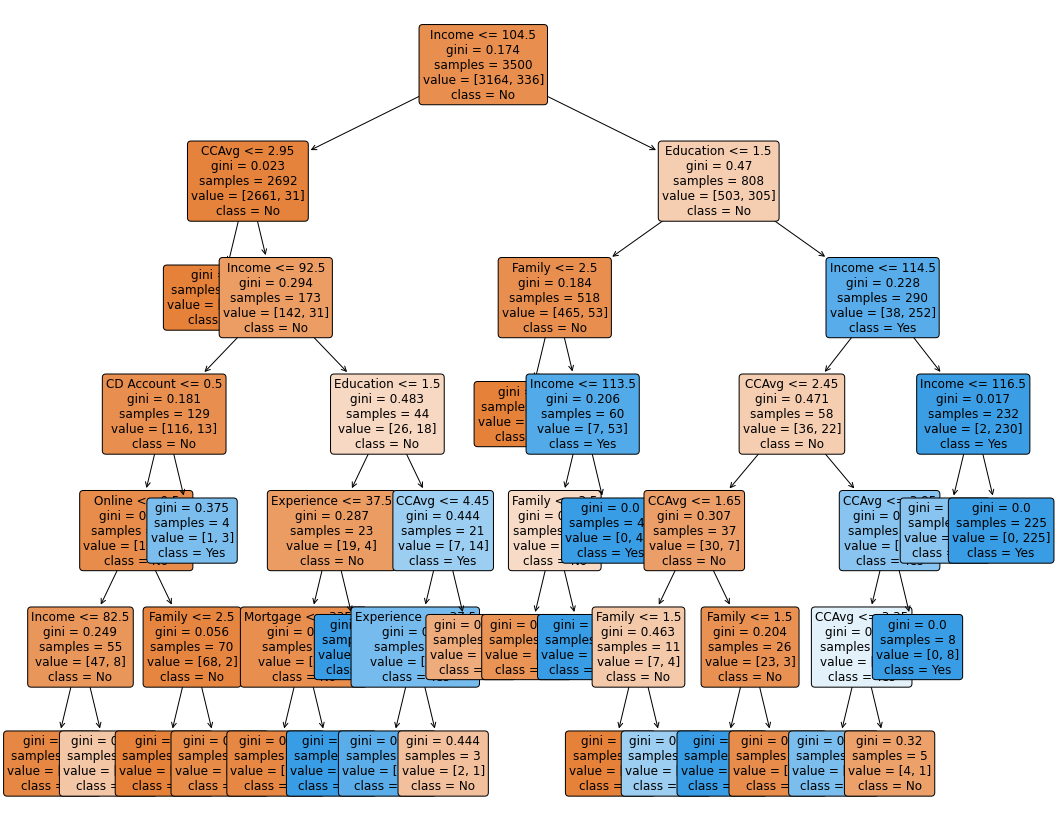

In [21]:
##  트리 시각화
feature_name = X.columns.tolist()
target = np.array(['No', 'Yes'])

plt.figure(figsize = (18,15))

tree = plot_tree(tree_m_new, feature_names = feature_name,
                 class_names = target, filled = True,
                 rounded = True, fontsize = 12)